# 1. Introduction
## 1.1 Definition
In machine learning, the **train-test split** is a technique used to evaluate the performance of a model. It involves dividing the available dataset into two or more subsets:
* a training set and
* a test set (and sometimes a validation set).

#### The train-test split process typically follows these steps:
1. **Training Set:** The training set is used to *train the model.* The model learns the underlying patterns and relationships in the data during the training process.
2. **Test Set:** The test set is used to *evaluate the performance of the trained model.* The model is applied to the test set, and its performance metrics (such as **accuracy, precision, recall, F1-score,** etc.) are measured. This gives an estimate of how the model will perform on unseen data.

**Thanks to:**
* [Used Car Price Prediction Dataset](https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset)
* [Car price prediction](https://www.kaggle.com/code/zabihullah18/car-price-prediction)

# 2. Import libraries

In [1]:
# import the necessary required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 3. Load the dataset

In [2]:
# load the raw dataset of used car from github
url = "https://raw.githubusercontent.com/akdubey2k/ML/main/ML_6_Training_and_Testing_Data/ML_6_used_cars.csv"
df = pd.read_csv(url)
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


### About Dataset
Used Car Price Prediction Dataset is a comprehensive collection of automotive information extracted from the popular automotive marketplace website, https://www.cars.com. This dataset comprises 4,009 data points, each representing a unique vehicle listing, and includes nine distinct features providing valuable insights into the world of automobiles.

* Brand & Model: Identify the brand or company name along with the specific model of each vehicle.
* Model Year: Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements.
* Mileage: Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.
* Fuel Type: Learn about the type of fuel the vehicles run on, whether it's gasoline, diesel, electric, or hybrid.
* Engine Type: Understand the engine specifications, shedding light on performance and efficiency.
* Transmission: Determine the transmission type, whether automatic, manual, or another variant.
* Exterior & Interior Colors: Explore the aesthetic aspects of the vehicles, including exterior and interior color options.
* Accident History: Discover whether a vehicle has a prior history of accidents or damage, crucial for informed decision-making.
* Clean Title: Evaluate the availability of a clean title, which can impact the vehicle's resale value and legal status.
* Price: Access the listed prices for each vehicle, aiding in price comparison and budgeting.

This dataset is a valuable resource for automotive enthusiasts, buyers, and researchers interested in analyzing trends, making informed purchasing decisions or conducting studies related to the automotive industry and consumer preferences. Whether you are a data analyst, car buyer, or researcher, this dataset offers a wealth of information to explore and analyze.

# 4. Exploratory Data Analysis (EDA)

## 4.1 Dataframe shape of matrix in columns, and rows.

In [3]:
df.shape

(4009, 12)

## 4.2 Dataframe full information
* number of instance for each feature,
* number of features
* datatypes of features
* value or content of features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [5]:
# comprehensive list of car manufacturers from feature 'brand'
df.brand.unique()

array(['Ford', 'Hyundai', 'Lexus', 'INFINITI', 'Audi', 'Acura', 'BMW',
       'Tesla', 'Land', 'Aston', 'Toyota', 'Lincoln', 'Jaguar',
       'Mercedes-Benz', 'Dodge', 'Nissan', 'Genesis', 'Chevrolet', 'Kia',
       'Jeep', 'Bentley', 'Honda', 'Lucid', 'MINI', 'Porsche', 'Hummer',
       'Chrysler', 'Volvo', 'Cadillac', 'Lamborghini', 'Maserati',
       'Volkswagen', 'Subaru', 'Rivian', 'GMC', 'RAM', 'Alfa', 'Ferrari',
       'Scion', 'Mitsubishi', 'Mazda', 'Saturn', 'Bugatti', 'Polestar',
       'Rolls-Royce', 'McLaren', 'Buick', 'Lotus', 'Pontiac', 'FIAT',
       'Karma', 'Saab', 'Mercury', 'Plymouth', 'smart', 'Maybach',
       'Suzuki'], dtype=object)

In [6]:
# all the column labels of the database
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [7]:
# check missing value
df.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,170
engine,0
transmission,0
ext_col,0
int_col,0
accident,113


In [8]:
# check duplication
df.duplicated().sum()

0

In [9]:
# Check statistics of data set
df.describe()

,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


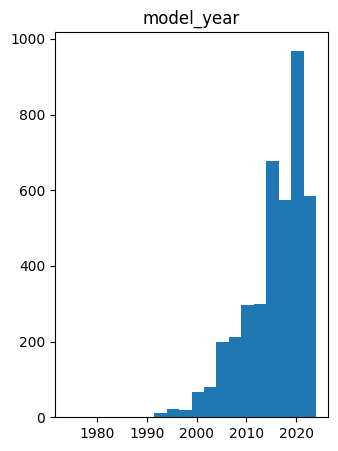

In [10]:
# histogram to bin the data in x and count the number of values in each bin
plt.figure(figsize=(12, 5))

for feature in df.columns:
    if df[feature].dtype in ['int64', 'float64']: # Check if the feature is numeric
        plt.subplot(1, 3, 1)
        plt.title(feature)
        plt.hist(df[feature], bins=20)
        plt.show() # Display each histogram separately

In [11]:
# count the number of unique distinct elements in each specified axis
df.nunique()

,0
brand,57
model,1898
model_year,34
milage,2818
fuel_type,7
engine,1146
transmission,62
ext_col,319
int_col,156
accident,2


In [12]:
# category of each feature vector
for col in df.columns:
  print(f"Category in {col}:\n {df[col].unique()}\n")

Category in brand:
 ['Ford' 'Hyundai' 'Lexus' 'INFINITI' 'Audi' 'Acura' 'BMW' 'Tesla' 'Land'
 'Aston' 'Toyota' 'Lincoln' 'Jaguar' 'Mercedes-Benz' 'Dodge' 'Nissan'
 'Genesis' 'Chevrolet' 'Kia' 'Jeep' 'Bentley' 'Honda' 'Lucid' 'MINI'
 'Porsche' 'Hummer' 'Chrysler' 'Volvo' 'Cadillac' 'Lamborghini' 'Maserati'
 'Volkswagen' 'Subaru' 'Rivian' 'GMC' 'RAM' 'Alfa' 'Ferrari' 'Scion'
 'Mitsubishi' 'Mazda' 'Saturn' 'Bugatti' 'Polestar' 'Rolls-Royce'
 'McLaren' 'Buick' 'Lotus' 'Pontiac' 'FIAT' 'Karma' 'Saab' 'Mercury'
 'Plymouth' 'smart' 'Maybach' 'Suzuki']

Category in model:
 ['Utility Police Interceptor Base' 'Palisade SEL' 'RX 350 RX 350' ...
 'Martin DB7 Vantage Volante' 'Impala 2LZ' 'Taycan']

Category in model_year:
 [2013 2021 2022 2015 2016 2017 2001 2020 2019 2003 2018 2023 2000 2006
 2011 2012 2007 2014 2005 2009 2010 2004 2008 1997 1999 1993 2002 1998
 2024 1996 1974 1992 1995 1994]

Category in milage:
 ['51,000 mi.' '34,742 mi.' '22,372 mi.' ... '53,705 mi.' '714 mi.'
 '2,116 mi.']

C

# 5. Split the dataset into 'train' and 'test' set

In [13]:
# Split arrays or matrices into random train and test subsets.
X = df.drop('price', axis=1)
y = df['price']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3006 entries, 3476 to 2868
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3006 non-null   object
 1   model         3006 non-null   object
 2   model_year    3006 non-null   int64 
 3   milage        3006 non-null   object
 4   fuel_type     2883 non-null   object
 5   engine        3006 non-null   object
 6   transmission  3006 non-null   object
 7   ext_col       3006 non-null   object
 8   int_col       3006 non-null   object
 9   accident      2922 non-null   object
 10  clean_title   2553 non-null   object
dtypes: int64(1), object(10)
memory usage: 281.8+ KB


In [15]:
X_train

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
3476,Mercedes-Benz,E-Class E 350 4MATIC,2014,"89,563 mi.",Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,Black,None reported,Yes
1824,Volkswagen,Golf R 4-Door,2013,"102,750 mi.",Gasoline,256.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed M/T,Black,Black,None reported,Yes
13,Lincoln,Aviator Reserve AWD,2022,"18,196 mi.",Gasoline,400.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Brown,None reported,Yes
558,Cadillac,Escalade ESV Platinum,2018,"67,726 mi.",Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,10-Speed A/T,Black,Black,None reported,Yes
2400,Chevrolet,Avalanche 1500 LS,2005,"97,146 mi.",E85 Flex Fuel,295.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,Transmission Overdrive Switch,Black,Gray,At least 1 accident or damage reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...
2180,Ford,F-250 XLT,2019,"124,000 mi.",E85 Flex Fuel,385.0HP 6.2L 8 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,White,Gray,None reported,Yes
3316,Jaguar,XF 25t Prestige,2018,"37,777 mi.",Gasoline,247.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes
3394,Audi,RS 7 4.0T Prestige,2016,"64,800 mi.",Gasoline,560.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,None reported,Yes
2420,Ford,Flex Limited,2009,"162,000 mi.",Gasoline,262.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Gray,Black,At least 1 accident or damage reported,Yes


In [16]:
X_test

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
2735,Mercedes-Benz,GLC 300 GLC 300,2022,"16,983 mi.",Gasoline,2.0 Liter Turbo,Automatic,Black,Black,None reported,NaN
3749,Dodge,Ram 2500 Quad Cab,2001,"171,079 mi.",Diesel,245.0HP 5.9L Straight 6 Cylinder Engine Diesel...,A/T,Silver,Gray,None reported,Yes
2271,Jeep,Wrangler Sahara,2008,"140,000 mi.",Gasoline,202.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,–,At least 1 accident or damage reported,Yes
1879,Chevrolet,Corvette Stingray w/3LT,2021,"12,000 mi.",Gasoline,490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,At least 1 accident or damage reported,Yes
518,Tesla,Model Y Long Range,2021,"61,308 mi.",NaN,425.0HP Electric Motor Electric Fuel System,A/T,White,White,None reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...
77,Maserati,Quattroporte S,2019,"23,230 mi.",Gasoline,424.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Black,None reported,Yes
254,Lamborghini,Huracan Tecnica Coupe,2023,278 mi.,Gasoline,"5.2L V-10 gasoline direct injection, DOHC, var...",Automatic,Bianco Monocerus,Nero Ade,None reported,NaN
2153,Buick,Enclave Leather,2017,"83,280 mi.",Gasoline,3.6L V6 24V GDI DOHC,6-Speed Automatic,Quicksilver Metallic,Ebony,None reported,NaN
2386,Hyundai,Genesis Coupe 2.0T R-Spec,2013,"55,000 mi.",Gasoline,260.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed M/T,White,Red,NaN,NaN


In [17]:
y_train

,price
3476,"$18,995"
1824,"$20,000"
13,"$62,000"
558,"$52,000"
2400,"$7,999"
...,...
2180,"$40,100"
3316,"$32,500"
3394,"$50,000"
2420,"$7,500"


In [18]:
y_test

,price
2735,"$40,998"
3749,"$27,500"
2271,"$9,000"
1879,"$99,900"
518,"$42,000"
...,...
77,"$44,999"
254,"$359,991"
2153,"$20,599"
2386,"$18,000"
